<a href="https://colab.research.google.com/github/alexsimas07/Projeto_imersao_IA_Alura---Clinica-de-usina-solar/blob/main/Projeto_previsao_POA_PRODUCAO_CJ1_Rev03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3º Modelo teste para aprendizagem

### Tentaremos criar um modelo que consiga retornar um valor de POA para usina CJ1.

* Primeiro projeto da Usina CJ1 usando ML - Regressão.
* Melhoramento do modelo.
* Tentaremos aumentar a quantidade de dados para melhorar o resultado.
* Tentaremos usar outros algoritmos de machine learning.
* Pegamos dados do mês de março de 2023 até março de 2024.
* E usaremos somente a coluna produção e POA.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Instalando pacote watermark
!pip install -q -U watermark

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print("Versão da Linguagem Python usada neste Colab Notebook:", python_version())

Versão da Linguagem Python usada neste Colab Notebook: 3.10.12


In [ ]:
# Carregando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn
import seaborn as sns
import yellowbrick
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# Versão dos pacotes usados neste Colab Notebook
%reload_ext watermark
%watermark -a 'Analista de dados - Alexsander Maia Simas' --iversion

Author: Analista de dados - Alexsander Maia Simas

matplotlib : 3.7.1
plotly     : 5.15.0
google     : 2.0.3
seaborn    : 0.13.1
numpy      : 1.25.2
yellowbrick: 1.5
pandas     : 2.0.3
sklearn    : 1.2.2



In [ ]:
dados_cj1 = pd.read_csv("/content/drive/Shareddrives/Engenharia BULBE/05 - OeM/22 - Dados Python/PRIORIDADE - Modelo de POA/Modelo_ML_CJ1/Modelo_3_revisao/Dados_treino_1_ano/dados_producao_poa_QOS_1_ano.csv", sep = ';')
dados_cj1.head()

Date (-03:00)  AC Power - Inverter reading (W)  \
0  01/03/2023 00:05:00                              0.0   
1  01/03/2023 00:10:00                              0.0   
2  01/03/2023 00:15:00                              0.0   
3  01/03/2023 00:20:00                              0.0   
4  01/03/2023 00:25:00                              0.0   

   Solar Irradiation Robust (W/m²)  
0                           0.8885  
1                           0.8875  
2                           0.8312  
3                           0.8091  
4                           0.8222

In [ ]:
dados_cj1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114336 entries, 0 to 114335
Data columns (total 3 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Date (-03:00)                    114336 non-null  object 
 1   AC Power - Inverter reading (W)  114272 non-null  float64
 2   Solar Irradiation Robust (W/m²)  99772 non-null   float64
dtypes: float64(2), object(1)
memory usage: 2.6+ MB


In [ ]:
# Criei uma função para dividir os dados da coluna Date (-03:00) e dividi em duas colunas - Dia e Hora
# Neste caso a limpeza fica mais rapida e posteriormente é só apagar as colunas e converter para float64

def dividir_string(texto):
  dia = texto[:10]
  hora = texto[11:19]
  return dia, hora

In [ ]:
dados_cj1[['dia', 'hora']] = dados_cj1['Date (-03:00)'].apply(lambda x: pd.Series(dividir_string(x)))
dados_cj1.head()

Date (-03:00)  AC Power - Inverter reading (W)  \
0  01/03/2023 00:05:00                              0.0   
1  01/03/2023 00:10:00                              0.0   
2  01/03/2023 00:15:00                              0.0   
3  01/03/2023 00:20:00                              0.0   
4  01/03/2023 00:25:00                              0.0   

   Solar Irradiation Robust (W/m²)         dia      hora  
0                           0.8885  01/03/2023  00:05:00  
1                           0.8875  01/03/2023  00:10:00  
2                           0.8312  01/03/2023  00:15:00  
3                           0.8091  01/03/2023  00:20:00  
4                           0.8222  01/03/2023  00:25:00

In [ ]:
filtro_hora = (dados_cj1['hora'] >= ('00:00:00')) & (dados_cj1['hora'] <= ('05:55:00'))
filtro_hora_noturna = (dados_cj1['hora'] >= ('18:05:00')) & (dados_cj1['hora'] <= ('23:55:00'))

In [ ]:
dados_cj1 = dados_cj1.drop(dados_cj1[filtro_hora].index)
dados_cj1 = dados_cj1.drop(dados_cj1[filtro_hora_noturna].index)

<ipython-input-11-078dc58a31b1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados_cj1 = dados_cj1.drop(dados_cj1[filtro_hora_noturna].index)


In [ ]:
dados_cj1.head(146)

Date (-03:00)  AC Power - Inverter reading (W)  \
71   01/03/2023 06:00:00                          22073.0   
72   01/03/2023 06:05:00                          36817.0   
73   01/03/2023 06:10:00                          46455.0   
74   01/03/2023 06:15:00                          64434.0   
75   01/03/2023 06:20:00                          66940.0   
..                   ...                              ...   
212  01/03/2023 17:45:00                          54446.0   
213  01/03/2023 17:50:00                          43866.0   
214  01/03/2023 17:55:00                          37706.0   
215  01/03/2023 18:00:00                          64820.0   
359  02/03/2023 06:00:00                          18526.0   

     Solar Irradiation Robust (W/m²)         dia      hora  
71                            9.2452  01/03/2023  06:00:00  
72                           14.2096  01/03/2023  06:05:00  
73                           17.6970  01/03/2023  06:10:00  
74                           20.2984  01/03/2023  06:15:00  
75                           23.0962  01/03/2023  06:20:00  
..                               ...         ...       ...  
212                          21.6693  01/03/2023  17:45:00  
213                          18.1498  01/03/2023  17:50:00  
214                          15.9369  01/03/2023  17:55:00  
215                          28.5362  01/03/2023  18:00:00  
359                           7.8760  02/03/2023  06:00:00  

[146 rows x 5 columns]

In [ ]:
dados_cj1.reset_index(drop=True)

Date (-03:00)  AC Power - Inverter reading (W)  \
0      01/03/2023 06:00:00                          22073.0   
1      01/03/2023 06:05:00                          36817.0   
2      01/03/2023 06:10:00                          46455.0   
3      01/03/2023 06:15:00                          64434.0   
4      01/03/2023 06:20:00                          66940.0   
...                    ...                              ...   
57560  31/03/2024 17:40:00                          72823.0   
57561  31/03/2024 17:45:00                          79986.0   
57562  31/03/2024 17:50:00                          25645.0   
57563  31/03/2024 17:55:00                           9897.0   
57564  31/03/2024 18:00:00                            636.0   

       Solar Irradiation Robust (W/m²)         dia      hora  
0                               9.2452  01/03/2023  06:00:00  
1                              14.2096  01/03/2023  06:05:00  
2                              17.6970  01/03/2023  06:10:00  
3                              20.2984  01/03/2023  06:15:00  
4                              23.0962  01/03/2023  06:20:00  
...                                ...         ...       ...  
57560                              NaN  31/03/2024  17:40:00  
57561                              NaN  31/03/2024  17:45:00  
57562                              NaN  31/03/2024  17:50:00  
57563                              NaN  31/03/2024  17:55:00  
57564                              NaN  31/03/2024  18:00:00  

[57565 rows x 5 columns]

### Tratamento para valores NA e 0.

In [ ]:
dados_cj1.replace(0, pd.NA, inplace=True)

In [ ]:
dados_cj1.isna().sum()

Date (-03:00)                         0
AC Power - Inverter reading (W)       9
Solar Irradiation Robust (W/m²)    2435
dia                                   0
hora                                  0
dtype: int64

identificamos 1633 e 3227 dados NA ou zerados que foi substituido para NA. Vamos elimina-los e ver como fica o dataset.

In [ ]:
dados_cj1.dropna(inplace=True)

In [ ]:
dados_cj1.isna().sum()

Date (-03:00)                      0
AC Power - Inverter reading (W)    0
Solar Irradiation Robust (W/m²)    0
dia                                0
hora                               0
dtype: int64

In [ ]:
dados_cj1.describe()

AC Power - Inverter reading (W)  Solar Irradiation Robust (W/m²)
count                     5.513000e+04                     55130.000000
mean                      1.560509e+06                       601.722830
std                       9.292609e+05                       381.483616
min                       0.000000e+00                         0.000000
25%                       6.486385e+05                       231.404750
50%                       1.897280e+06                       695.465500
75%                       2.479787e+06                       943.889500
max                       2.500276e+06                      1200.000000

In [ ]:
import plotly.express as px
fig = px.box(dados_cj1, y="Solar Irradiation Robust (W/m²)")
fig.show()

In [ ]:
fig = px.box(dados_cj1, y="AC Power - Inverter reading (W)")
fig.show()

Pela descrição acima, podemos ver que o describe está mostrando que todas as colunas são object.
Vamos converte-las, mas antes eliminarmos as colunas dia e hora.

In [ ]:
dados_limpos = dados_cj1.drop(['dia', 'hora'], axis = 1)
dados_limpos.reset_index(drop=True)
dados_limpos.head()

Date (-03:00) AC Power - Inverter reading (W)  \
71  01/03/2023 06:00:00                         22073.0   
72  01/03/2023 06:05:00                         36817.0   
73  01/03/2023 06:10:00                         46455.0   
74  01/03/2023 06:15:00                         64434.0   
75  01/03/2023 06:20:00                         66940.0   

   Solar Irradiation Robust (W/m²)  
71                          9.2452  
72                         14.2096  
73                          17.697  
74                         20.2984  
75                         23.0962

In [ ]:
dados_limpos.describe()

Date (-03:00)  AC Power - Inverter reading (W)  \
count                 53267                          53267.0   
unique                53267                          42471.0   
top     01/03/2023 06:00:00                        2500017.0   
freq                      1                             84.0   

        Solar Irradiation Robust (W/m²)  
count                           53267.0  
unique                          48832.0  
top                              1200.0  
freq                              821.0

In [ ]:
dados_limpos['Date (-03:00)'] = pd.to_datetime(dados_limpos['Date (-03:00)'], format='%d/%m/%Y %H:%M:%S')
dados_limpos.set_index('Date (-03:00)', inplace = True)

In [ ]:
dados_limpos['AC Power - Inverter reading (W)'] = dados_limpos['AC Power - Inverter reading (W)'].astype('float64')
dados_limpos['Solar Irradiation Robust (W/m²)'] = dados_limpos['Solar Irradiation Robust (W/m²)'].astype('float64')

In [ ]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53267 entries, 2023-03-01 06:00:00 to 2024-03-31 17:05:00
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AC Power - Inverter reading (W)  53267 non-null  float64
 1   Solar Irradiation Robust (W/m²)  53267 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


## Vamos visualizar como os dados estão graficamente

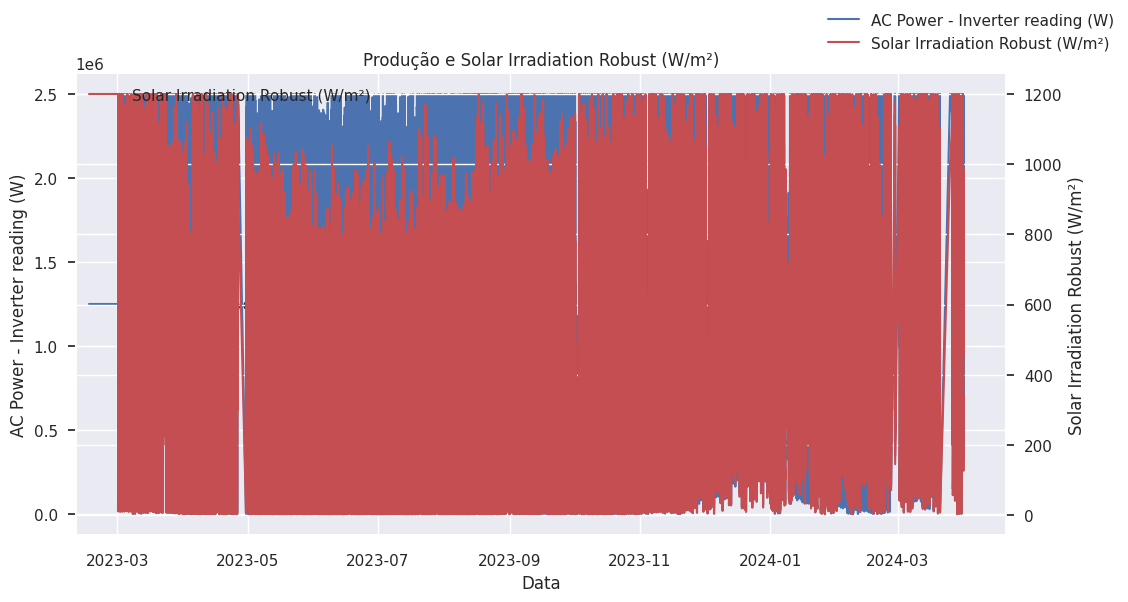

In [ ]:
# Configurando o estilo do gráfico
sns.set_theme(style='darkgrid')

# Criando uma figura e um eixo com Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando a potência AC
sns.lineplot(x=dados_limpos.index, y='AC Power - Inverter reading (W)', data=dados_limpos, ax=ax, label='AC Power - Inverter reading (W)')

# Criando um segundo eixo y para a irradiação
ax2 = ax.twinx()
sns.lineplot(x=dados_limpos.index, y='Solar Irradiation Robust (W/m²)', data=dados_limpos, ax=ax2, color='r', label='Solar Irradiation Robust (W/m²)')

# Adicionando legendas e títulos
ax.figure.legend()
ax.set_title('Produção e Solar Irradiation Robust (W/m²)')
ax.set_xlabel('Data')
ax.set_ylabel('AC Power - Inverter reading (W)')
ax2.set_ylabel('Solar Irradiation Robust (W/m²)')

# Exibir o gráfico
plt.show()

<Axes: xlabel='Date (-03:00)'>

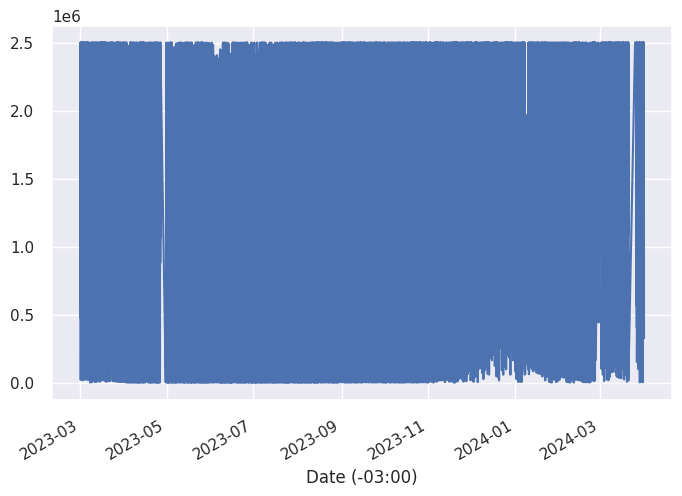

In [ ]:
dados_limpos['AC Power - Inverter reading (W)'].plot()

## Vamos verificar valores outliears

In [ ]:
from scipy.stats import chi2
from scipy.spatial import distance

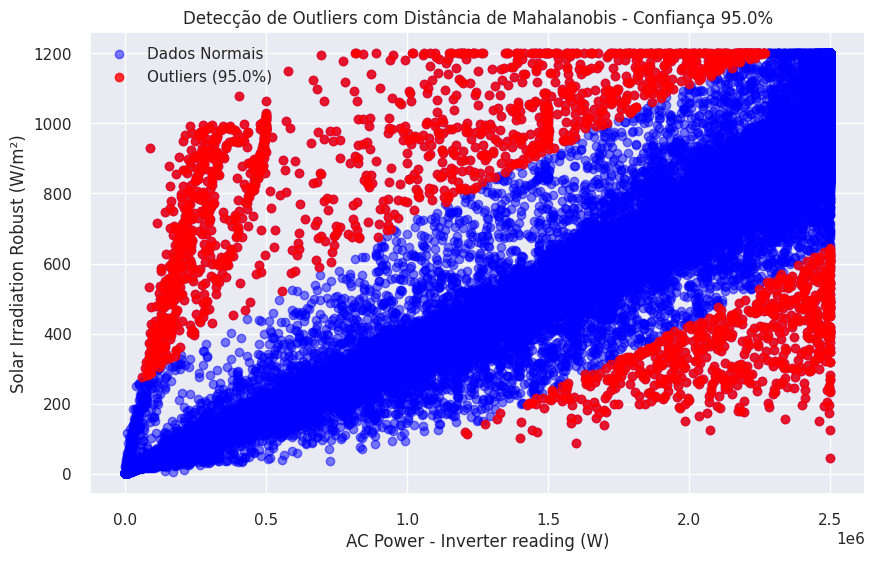

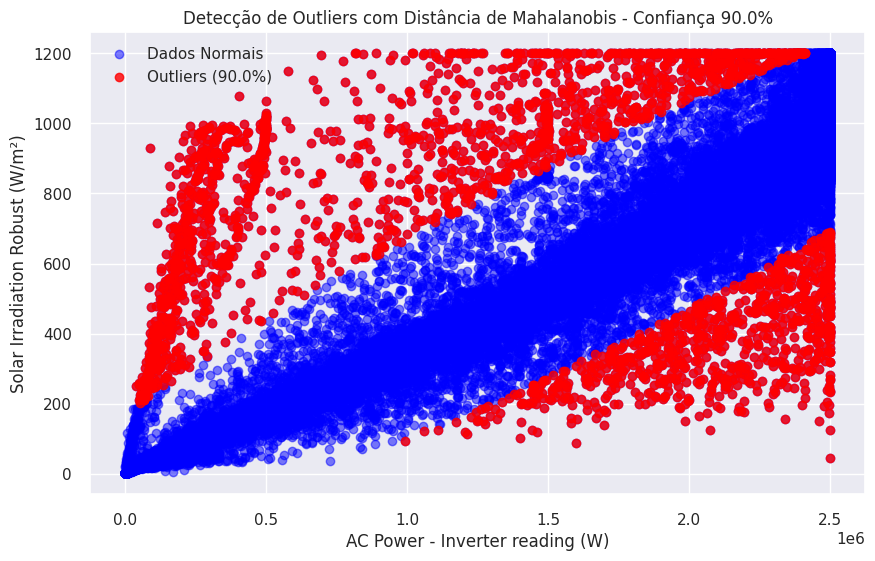

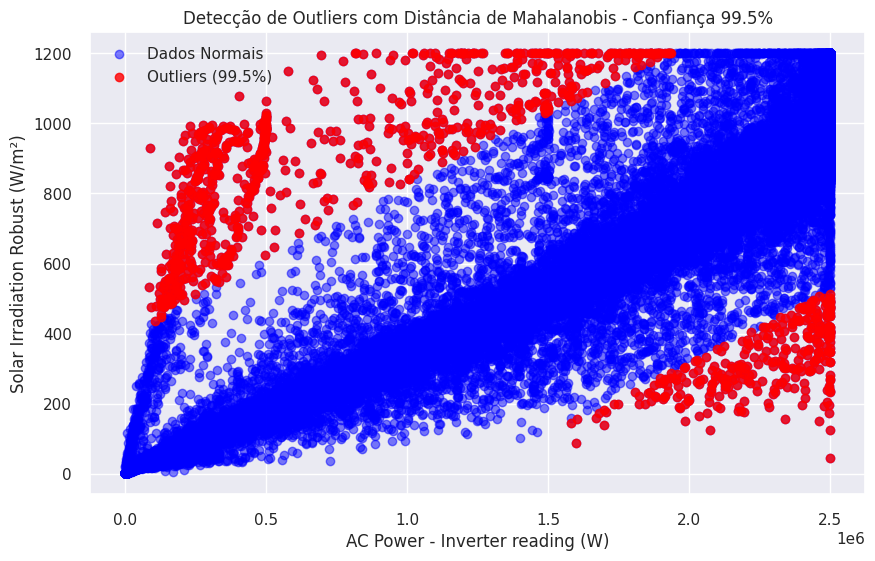

In [ ]:
# Calcular a matriz de covariância e a média dos dados
cov_matrix = np.cov(dados_limpos[['AC Power - Inverter reading (W)', 'Solar Irradiation Robust (W/m²)']], rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vals = np.mean(dados_limpos[['AC Power - Inverter reading (W)', 'Solar Irradiation Robust (W/m²)']], axis=0)

# Calcular a Distância Mahalanobis para cada ponto
dados_limpos['mahala'] = dados_limpos[['AC Power - Inverter reading (W)', 'Solar Irradiation Robust (W/m²)']].apply(lambda x: distance.mahalanobis(x, mean_vals, inv_cov_matrix), axis=1)

# Ajustando diferentes níveis de confiança para análise
nivel_confianca = [0.95, 0.90, 0.995]

for nc in nivel_confianca:
    threshold = chi2.ppf(nc, df=2)
    dados_limpos['outlier'] = dados_limpos['mahala'] > np.sqrt(threshold)

    # Plotando os resultados para cada nível de confiança
    plt.figure(figsize=(10, 6))
    plt.scatter(dados_limpos['AC Power - Inverter reading (W)'], dados_limpos['Solar Irradiation Robust (W/m²)'], color='blue', alpha=0.5, label='Dados Normais')
    plt.scatter(dados_limpos.loc[dados_limpos['outlier'], 'AC Power - Inverter reading (W)'], dados_limpos.loc[dados_limpos['outlier'], 'Solar Irradiation Robust (W/m²)'], color='red', alpha=0.8, label=f'Outliers ({nc*100}%)')

    plt.xlabel('AC Power - Inverter reading (W)')
    plt.ylabel('Solar Irradiation Robust (W/m²)')
    plt.title(f'Detecção de Outliers com Distância de Mahalanobis - Confiança {nc*100}%')
    plt.legend()
    plt.show()

In [ ]:
# Definindo o threshold com base em um nível de confiança de 90%
nivel_confianca = 0.90
threshold = chi2.ppf(nivel_confianca, df=2)
dados_limpos['outlier'] = dados_limpos['mahala'] > np.sqrt(threshold)

# Criando o novo DataFrame sem os outliers
dados_limpos_cj1 = dados_limpos[~dados_limpos['outlier']].copy()

# Removendo registros onde Power-AC-W é maior que 100 e POA é 0
dados_limpos_cj1 = dados_limpos_cj1[~((dados_limpos_cj1['AC Power - Inverter reading (W)'] > 100) & (dados_limpos_cj1['Solar Irradiation Robust (W/m²)'] == 0))]

# Exibindo as primeiras linhas do novo DataFrame limpo
dados_limpos_cj1.head()

AC Power - Inverter reading (W)  \
Date (-03:00)                                          
2023-03-01 06:00:00                          22073.0   
2023-03-01 06:05:00                          36817.0   
2023-03-01 06:10:00                          46455.0   
2023-03-01 06:15:00                          64434.0   
2023-03-01 06:20:00                          66940.0   

                     Solar Irradiation Robust (W/m²)    mahala  outlier  
Date (-03:00)                                                            
2023-03-01 06:00:00                           9.2452  1.761370    False  
2023-03-01 06:05:00                          14.2096  1.745075    False  
2023-03-01 06:10:00                          17.6970  1.734406    False  
2023-03-01 06:15:00                          20.2984  1.715179    False  
2023-03-01 06:20:00                          23.0962  1.712027    False

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_limpos_cj1['AC Power - Inverter reading (W)'], y=dados_limpos_cj1['Solar Irradiation Robust (W/m²)'], mode='markers', marker=dict(size=6,opacity=0.6)))
fig.update_layout(title='Gráfico de distribuição de pontos',
                  xaxis_title='Produção',
                  yaxis_title='POA')
fig.show()

Esse gráfico mostra que a distribuição dos dados de produção e POA estão bem condizentes com a realidade e seguindo uma inclunação positiva o que realmente representa na pratica.

In [ ]:
dados_filtrados = dados_limpos_cj1['2023-05-05':'2023-05-10']
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_filtrados.index, y=dados_filtrados['AC Power - Inverter reading (W)'], mode='lines', name='AC Power - Inverter reading (W)'))
fig.add_trace(go.Scatter(x=dados_filtrados.index, y=dados_filtrados['Solar Irradiation Robust (W/m²)'], mode='lines', name='Solar Irradiation Robust (POA) (W/m²)', yaxis='y2',line=dict(color='red')))
fig.update_layout(title='AC Power - Inverter reading (W) e Solar Irradiation Robust (POA) (W/m²)',
                  xaxis_title='Data',
                  yaxis_title='Valores',
                  yaxis=dict(title='AC Power - Inverter reading (W)', side='left'),
                  yaxis2=dict(title='Solar Irradiation Robust (POA) (W/m²)', overlaying='y', side='right', position=0.98))
fig.show()

In [ ]:
# Antes de seguir para a próxima etapa, vamos tirar as colunas mahal e outlier e salvar em outro dataframe
dados_limpos_cj1 = dados_limpos_cj1.drop(['mahala', 'outlier'], axis = 1)
dados_limpos_cj1.head()

AC Power - Inverter reading (W)  \
Date (-03:00)                                          
2023-03-01 06:00:00                          22073.0   
2023-03-01 06:05:00                          36817.0   
2023-03-01 06:10:00                          46455.0   
2023-03-01 06:15:00                          64434.0   
2023-03-01 06:20:00                          66940.0   

                     Solar Irradiation Robust (W/m²)  
Date (-03:00)                                         
2023-03-01 06:00:00                           9.2452  
2023-03-01 06:05:00                          14.2096  
2023-03-01 06:10:00                          17.6970  
2023-03-01 06:15:00                          20.2984  
2023-03-01 06:20:00                          23.0962

## Análise Exploratória dos dados

In [ ]:
dados_limpos_cj1.columns

Index(['AC Power - Inverter reading (W)', 'Solar Irradiation Robust (W/m²)'], dtype='object')

In [ ]:
dados_limpos_cj1.corr()

AC Power - Inverter reading (W)  \
AC Power - Inverter reading (W)                         1.000000   
Solar Irradiation Robust (W/m²)                         0.969817   

                                 Solar Irradiation Robust (W/m²)  
AC Power - Inverter reading (W)                         0.969817  
Solar Irradiation Robust (W/m²)                         1.000000

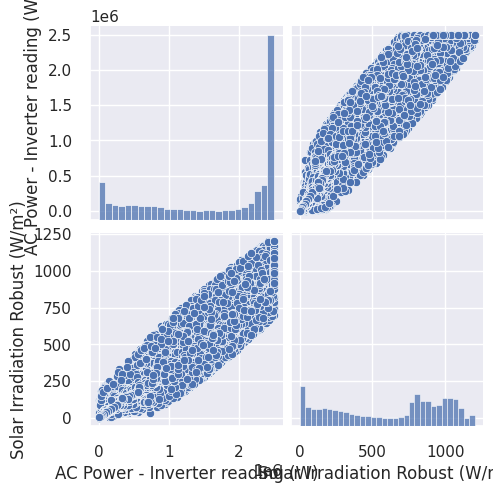

In [ ]:
sns.pairplot(dados_limpos_cj1)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



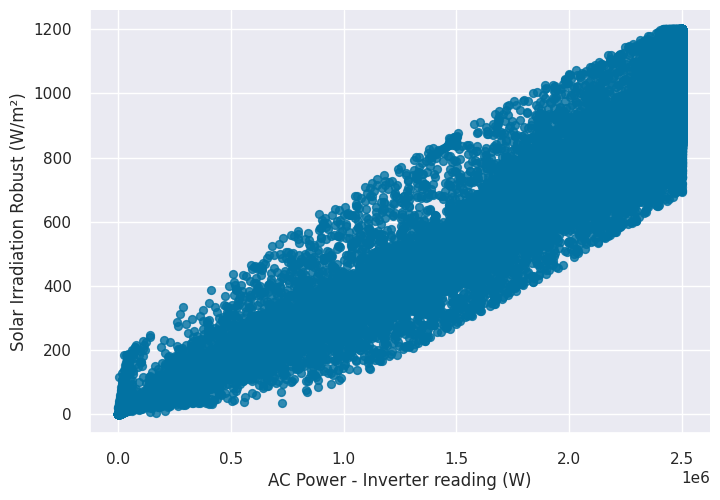

In [ ]:
dados_limpos_cj1.plot(kind='scatter', x='AC Power - Inverter reading (W)', y='Solar Irradiation Robust (W/m²)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 1800x1200 with 0 Axes>

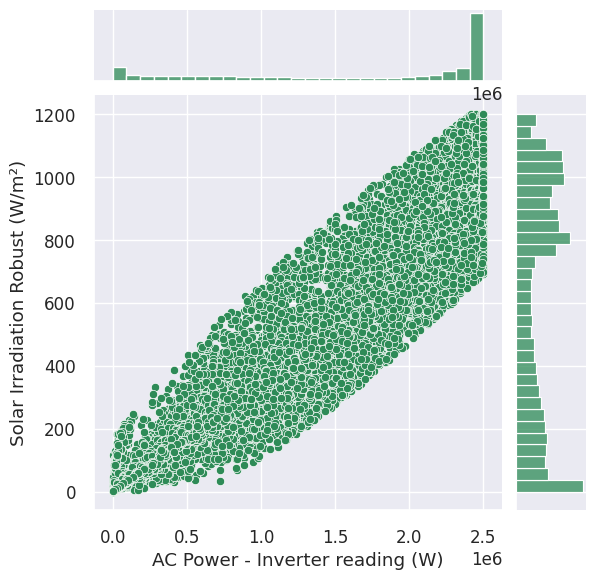

In [ ]:
plt.figure(figsize = (18,12))
sns.set(font_scale=1.1)
sns.jointplot(data = dados_limpos_cj1,
            x = 'AC Power - Inverter reading (W)',
            y = 'Solar Irradiation Robust (W/m²)',
            color = 'seagreen')

Com o gráfico acima, conseguimos enxergar que tem muitos valores 0 ou 0.0, atraves do gráfico de frequência e isso pode ser um problema que precisa ser resolvido.

---



<Figure size 1800x1200 with 0 Axes>

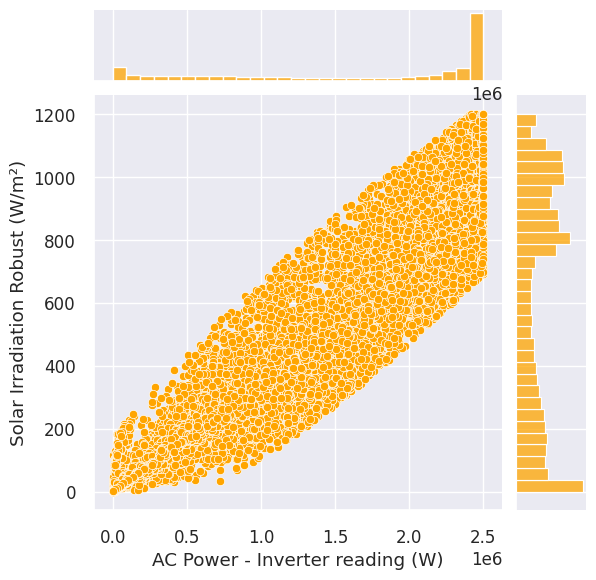

In [ ]:
dados_limpos_cj1 = dados_limpos_cj1.replace([0, 0.0, 0.000], pd.NA)
dados_limpos_cj1 = dados_limpos_cj1.dropna()
plt.figure(figsize = (18,12))
sns.set(font_scale=1.1)
sns.jointplot(data = dados_limpos_cj1,
            x = 'AC Power - Inverter reading (W)',
            y = 'Solar Irradiation Robust (W/m²)',
            color = 'orange')

In [ ]:
dados_limpos_cj1.describe()

AC Power - Inverter reading (W)  Solar Irradiation Robust (W/m²)
count                     5.065900e+04                     50659.000000
mean                      1.620134e+06                       614.772172
std                       9.047672e+05                       373.531460
min                       1.000000e+00                         0.765600
25%                       7.468815e+05                       247.305000
50%                       2.020022e+06                       728.091000
75%                       2.489058e+06                       946.768000
max                       2.500276e+06                      1200.000000

Como a descrição acima nos informa, o valor minimo agora é 0.76, neste caso é melhor pois o modelo vai treinar e aprender com dados de qualidade.

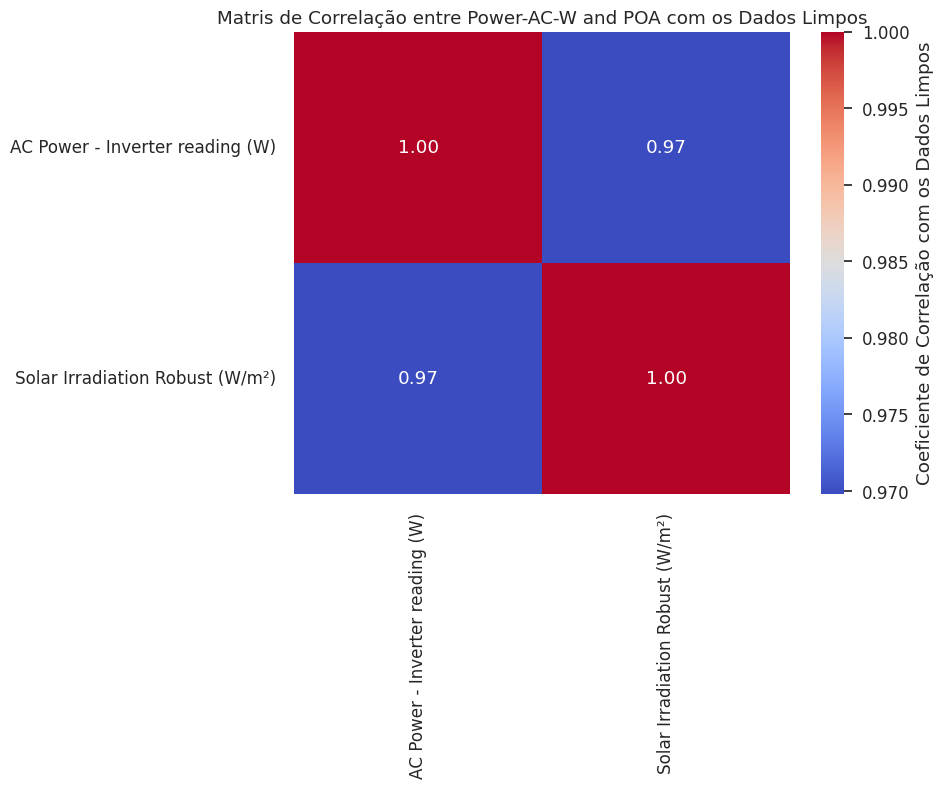

In [ ]:
# Calculando a matriz de correlação
corr_limpos = dados_limpos_cj1[['AC Power - Inverter reading (W)', 'Solar Irradiation Robust (W/m²)']].corr()

# Configurando o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o heatmap
sns.heatmap(corr_limpos, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Coeficiente de Correlação com os Dados Limpos'})

# Adicionando títulos e labels
plt.title('Matris de Correlação entre Power-AC-W and POA com os Dados Limpos')
plt.show()

## Seleção e validação do modelo ML
Treinamento do DummyRegressor - Lembrando o Dummy recomenda que não deve ser utlizado para problemas reais, somente para treinamento.

In [ ]:
# Separando em coluna de explicação ou variaveis explicativas (X)
# E coluna alvo ou coluna target (y)

X = dados_limpos_cj1[['AC Power - Inverter reading (W)']]
y= dados_limpos_cj1['Solar Irradiation Robust (W/m²)']

In [ ]:
# Separando o conjunto de dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
def calcular_metricas_regressao(y_test, y_pred):

  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  metricas = {
      'Raiz do erro quadrático médio': round(rmse, 4),
      'Erro Absoluto médio': round(mae, 4),
      'R2 Score': round(r2, 4)
  }

  return metricas

## Treinamento com Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=7)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadrático médio': 77.7041,
 'Erro Absoluto médio': 54.2227,
 'R2 Score': 0.9572}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



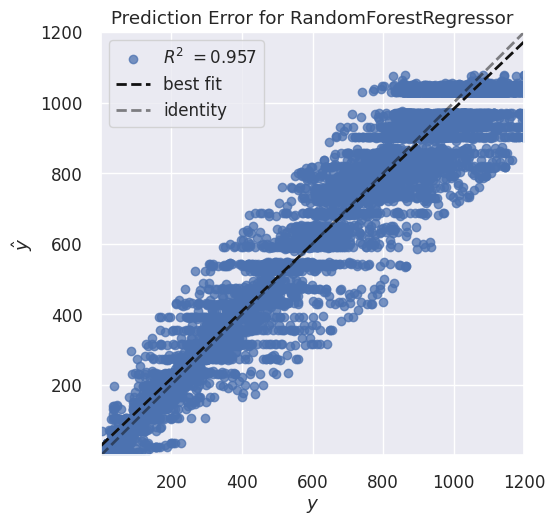

In [ ]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



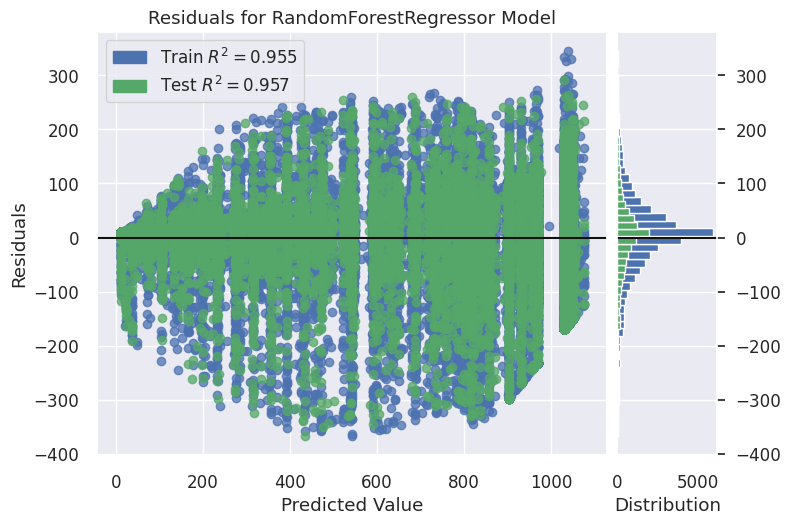

In [ ]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

O modelo está correspondendo bem

---



## Vamos fazer a validação cruzada

In [ ]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring = scoring)

In [ ]:
cv_results

{'fit_time': array([2.33449841, 2.27559137, 2.30852675, 2.31232643, 3.21774435,
        2.26967192, 2.24611354, 2.27210045, 2.2980926 , 3.20256805]),
 'score_time': array([0.02907252, 0.02948785, 0.03014398, 0.0303154 , 0.02949667,
        0.02953362, 0.02831078, 0.03418994, 0.02834678, 0.02910471]),
 'test_mae': array([-56.49475985, -55.73847684, -55.93124994, -54.94458917,
        -55.27954687, -56.14491262, -56.66964844, -55.34803353,
        -52.85641538, -56.12405354]),
 'test_rmse': array([-80.68743687, -80.58748792, -80.86942739, -78.47318674,
        -78.37022751, -80.79565479, -80.85787018, -79.1557424 ,
        -76.14219306, -79.78285465]),
 'test_r2': array([0.95311738, 0.95341577, 0.95239722, 0.95627848, 0.95672998,
        0.95284242, 0.95209147, 0.95492686, 0.95875394, 0.95343695])}

In [ ]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std:{std_score}")
    print('----------------------------------------------------------------')

MAE Scores: ['-56.495', '-55.738', '-55.931', '-54.945', '-55.280', '-56.145', '-56.670', '-55.348', '-52.856', '-56.124']
MAE Média: -55.553, Std:1.037
----------------------------------------------------------------
RMSE Scores: ['-80.687', '-80.587', '-80.869', '-78.473', '-78.370', '-80.796', '-80.858', '-79.156', '-76.142', '-79.783']
RMSE Média: -79.572, Std:1.475
----------------------------------------------------------------
R2 Scores: ['0.953', '0.953', '0.952', '0.956', '0.957', '0.953', '0.952', '0.955', '0.959', '0.953']
R2 Média: 0.954, Std:0.002
----------------------------------------------------------------


Mesmo aumentando o numero de n_splits para 10, o R2 Score melhorou pouca coisa, porém o MAE diminiu e o RMSE também.

---



## Vamos fazer a otimização de hiperparâmetros com GridSearchCV

In [ ]:
#Criando um dicionario para os parametros setados

param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 150, 200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=10)

model_grid = GridSearchCV(RandomForestRegressor(random_state=10), param_grid= param_grid,
                          scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='r2')

In [ ]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
y_pred_model_grid = model_grid.predict(X_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do erro quadrático médio': 77.6942,
 'Erro Absoluto médio': 54.2174,
 'R2 Score': 0.9572}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



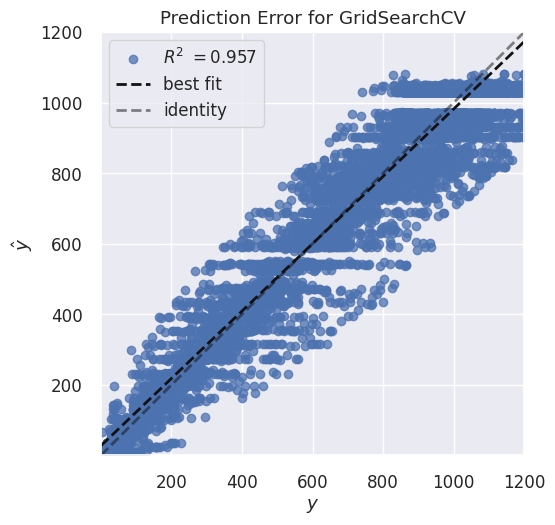

In [ ]:
visualizer = prediction_error(model_grid, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



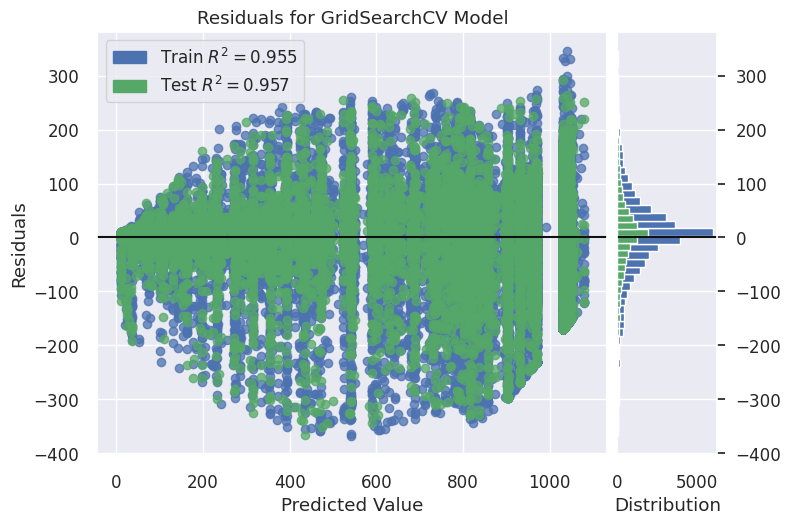

In [ ]:
viz = residuals_plot(model_grid, X_train, y_train, X_test, y_test)

## Vamos usar o algoritmo de Regressão Linear do SKlearn

In [ ]:
modelo_v1 = LinearRegression()

In [ ]:
modelo_v1.fit(X_train, y_train)
y_pred_rf = modelo_v1.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadrático médio': 90.3236,
 'Erro Absoluto médio': 69.8885,
 'R2 Score': 0.9422}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



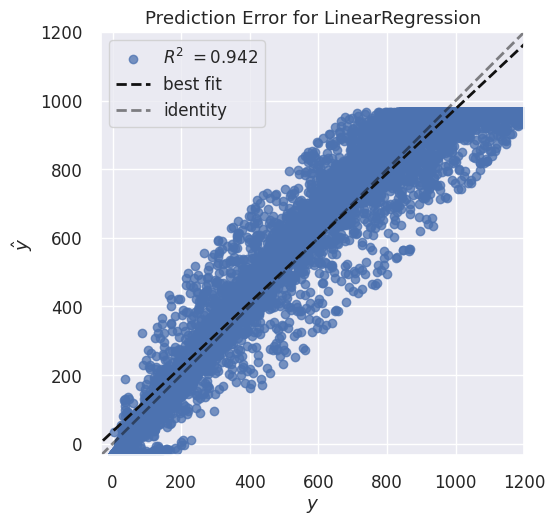

In [ ]:
visualizer = prediction_error(modelo_v1, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



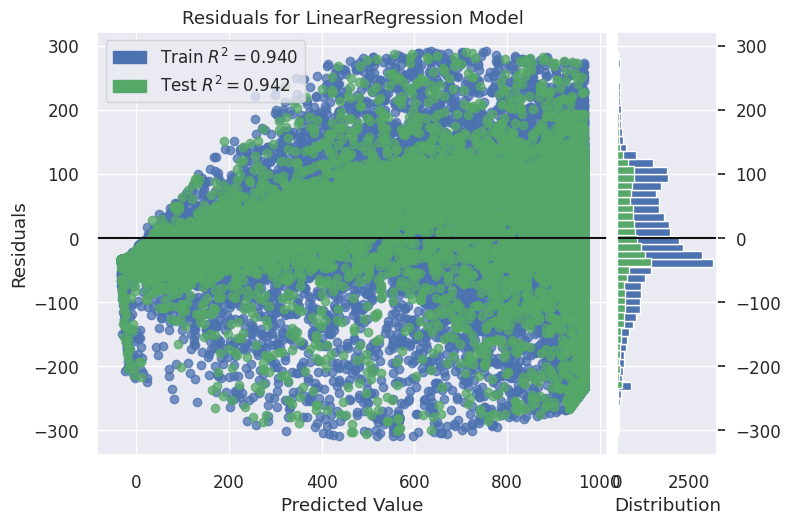

In [ ]:
viz = residuals_plot(modelo_v1, X_train, y_train, X_test, y_test)

Está claro que o algoritmo LinearRegression apresentou resultados piores que o RandomForesteRegressor

---



## Utilizando o algoritmo Regressão Ridge

In [ ]:
modelo_v2 = Ridge(alpha = 1.0)

In [ ]:
modelo_v2.fit(X_train, y_train)
y_pred_rf = modelo_v2.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadrático médio': 90.3236,
 'Erro Absoluto médio': 69.8885,
 'R2 Score': 0.9422}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



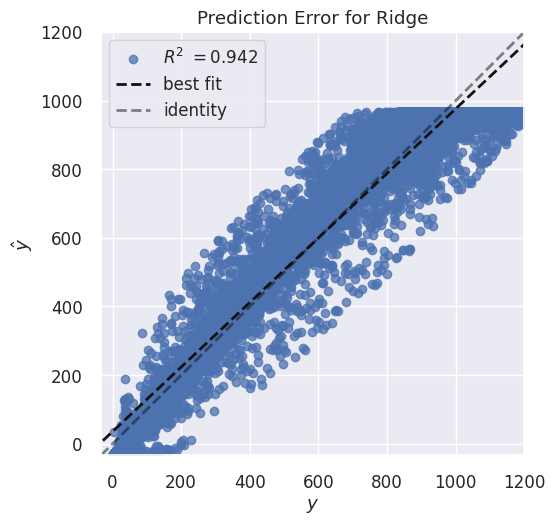

In [ ]:
visualizer = prediction_error(modelo_v2, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



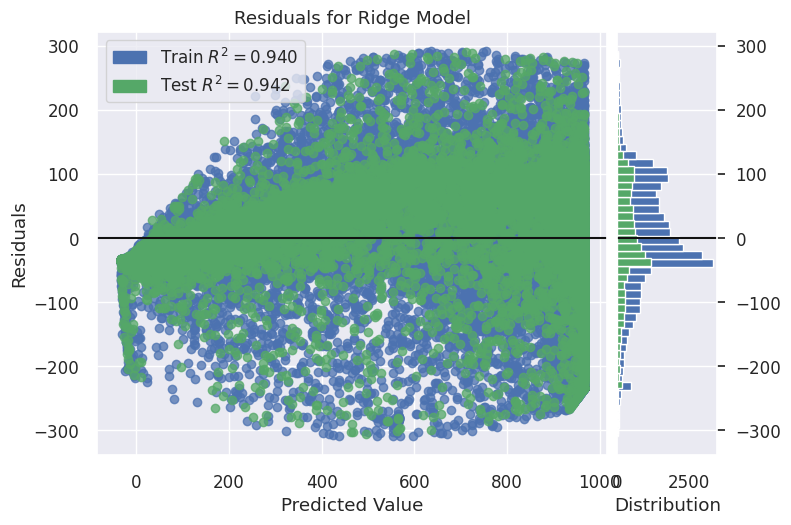

In [ ]:
viz = residuals_plot(modelo_v2, X_train, y_train, X_test, y_test)

Os modelos v1 e v2 apresentaram resultados bem abaixo do esperado.

---



In [ ]:
from sklearn import linear_model
modelo_v3 = linear_model.Lasso(alpha=0.1)
modelo_v3.fit(X_train, y_train)
y_pred_rf = modelo_v3.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadrático médio': 90.3236,
 'Erro Absoluto médio': 69.8885,
 'R2 Score': 0.9422}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names



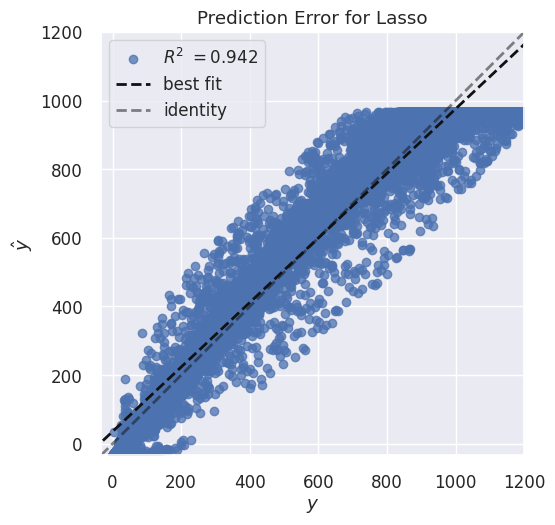

In [ ]:
visualizer = prediction_error(modelo_v3, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names



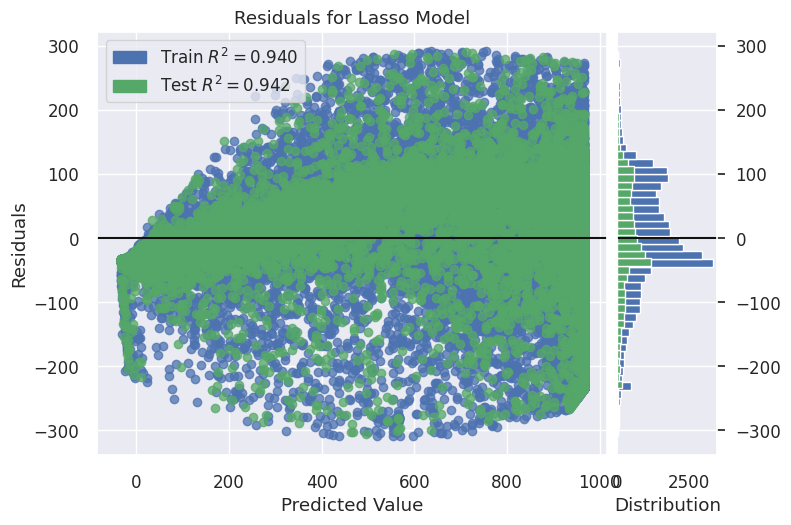

In [ ]:
viz = residuals_plot(modelo_v3, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.linear_model import TweedieRegressor
modelo_v4 = TweedieRegressor(power=1, alpha=0.5, link='log')
modelo_v4.fit(X_train, y_train)
y_pred_rf = modelo_v4.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadrático médio': 375.6638,
 'Erro Absoluto médio': 338.7755,
 'R2 Score': -0.0}

In [ ]:
modelo_v5 = linear_model.BayesianRidge()
modelo_v5.fit(X_train, y_train)
y_pred_rf = modelo_v5.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadrático médio': 90.3236,
 'Erro Absoluto médio': 69.8885,
 'R2 Score': 0.9422}

## Utlizando o API TPOT

In [ ]:
# Instalando o TPOT
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=1b2ae2c1f91321c97048a61761aff2a809b3383aebe2fe93e3e8b86199a530fa
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from tpot import TPOTRegressor

In [ ]:
tpot = TPOTRegressor(generations=15, population_size= 150, verbosity= 5, random_state=10)
tpot.fit(X_train, y_train)
y_pred_rf = tpot.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/2400 [00:00<?, ?pipeline/s]

Skipped pipeline #55 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'huber', 'squared_epsilon_insensitive', 'epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpect

{'Raiz do erro quadrático médio': 77.7115,
 'Erro Absoluto médio': 54.1984,
 'R2 Score': 0.9572}

## Salvando o modelo com melhor parâmetro

In [ ]:
import pickle

In [ ]:
# tratando erro para ver se vai de fato
try:
  with open('tpot_previsao_cj1.pkl', 'wb') as file:
    pickle.dump(tpot, file)
  print('Modelo salvo com sucesso!!!')
except Exception as e:
  print('Ocorreu um erro ao salvar o modelo:', str(e))

Ocorreu um erro ao salvar o modelo: Can't pickle <class 'tpot.operator_utils.ExtraTreesRegressor__bootstrap'>: attribute lookup ExtraTreesRegressor__bootstrap on tpot.operator_utils failed


## Vamos testar para novos dados

Vamos pegar os dados da UFV CJ1 dos dias 05/04 até 07/04 que estão travados e vamos além, aplicar uma taxa para calcular também o GHI.

In [ ]:
dados_cj1_valida = pd.read_csv("/content/export_analysis_174391_resolution_down_scale_5_2024-04-09_16-23-30.csv", sep = ';')
dados_cj1_valida.head()

Date (-03:00)  AC Power - Inverter reading (W)  \
0  05/04/2024 00:05:00                              0.0   
1  05/04/2024 00:10:00                              0.0   
2  05/04/2024 00:15:00                              0.0   
3  05/04/2024 00:20:00                              0.0   
4  05/04/2024 00:25:00                              0.0   

   Solar Irradiation Robust (W/m²)  
0                           1000.0  
1                           1000.0  
2                           1000.0  
3                           1000.0  
4                           1000.0

In [ ]:
dados_cj1_valida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date (-03:00)                    864 non-null    object 
 1   AC Power - Inverter reading (W)  864 non-null    float64
 2   Solar Irradiation Robust (W/m²)  864 non-null    float64
dtypes: float64(2), object(1)
memory usage: 20.4+ KB


In [ ]:
dados_cj1_valida['Date (-03:00)'] = pd.to_datetime(dados_cj1_valida['Date (-03:00)'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
dados_cj1_valida.set_index('Date (-03:00)', inplace=True)

In [ ]:
dados_cj1_valida.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 864 entries, 2024-04-05 00:05:00 to 2024-04-08 00:00:00
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AC Power - Inverter reading (W)  864 non-null    float64
 1   Solar Irradiation Robust (W/m²)  864 non-null    float64
dtypes: float64(2)
memory usage: 20.2 KB


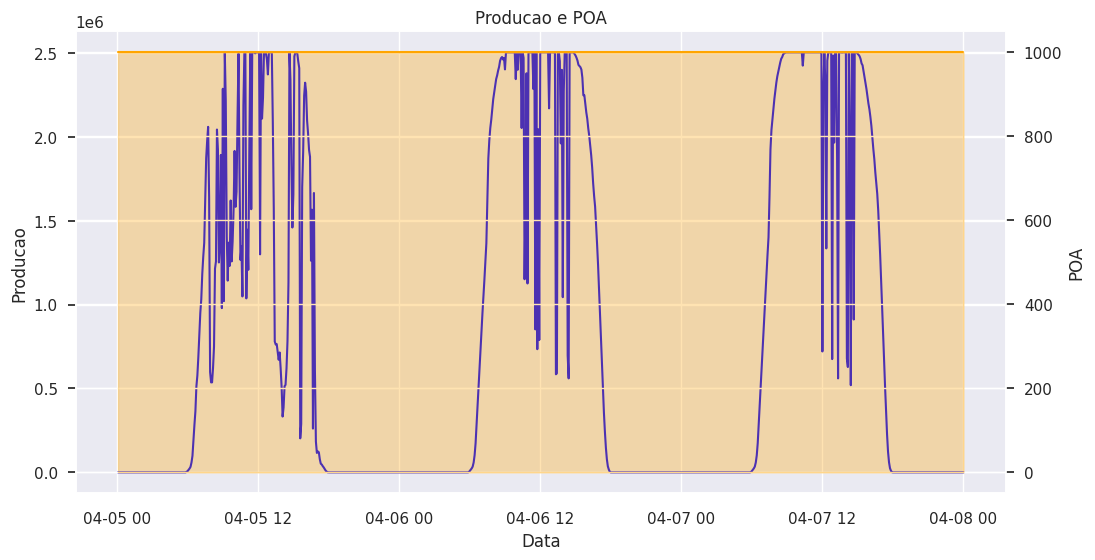

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(dados_cj1_valida.index, dados_cj1_valida['AC Power - Inverter reading (W)'], label='AC Power - Inverter reading (W)', color = 'blue')
ax2 = ax.twinx()
ax2.plot(dados_cj1_valida.index, dados_cj1_valida['Solar Irradiation Robust (W/m²)'], label='POA', color='orange')
ax2.fill_between(dados_cj1_valida.index, dados_cj1_valida['Solar Irradiation Robust (W/m²)'], color = 'orange', alpha=0.3)
ax.set_title('Producao e POA')
ax.set_xlabel('Data')
ax.set_ylabel('Producao')
ax2.set_ylabel('POA')
plt.show()

In [ ]:
dados_cj1_valida.columns = ['Producao', 'POA']

In [ ]:
X_valida = dados_cj1_valida[['Producao']]

dados_cj1_valida['POA_Pred'] = model_grid.predict(X_valida)

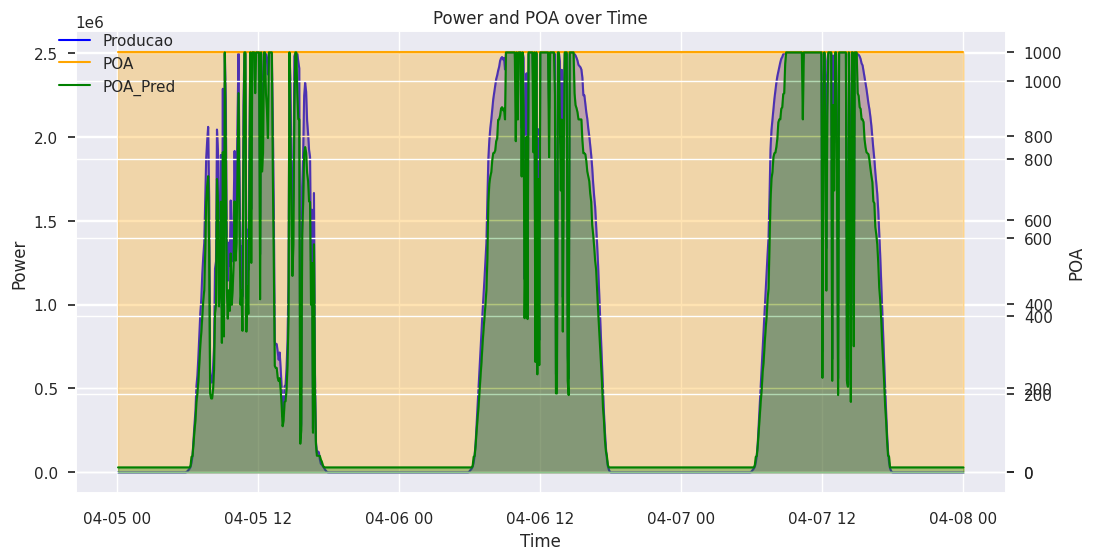

In [ ]:
sns.set_theme(style='darkgrid')

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando "Power" e preenchendo a área sob a curva
ax.plot(dados_cj1_valida.index, dados_cj1_valida['Producao'], label='Producao', color='blue')
ax.fill_between(dados_cj1_valida.index, dados_cj1_valida['Producao'], color='blue', alpha=0.3)

# Criando um segundo eixo para "POA"
ax2 = ax.twinx()

# Plotando "POA" e preenchendo a área sob a curva
ax2.plot(dados_cj1_valida.index, dados_cj1_valida['POA'], label='POA', color='orange')
ax2.fill_between(dados_cj1_valida.index, dados_cj1_valida['POA'], color='orange', alpha=0.3)

# Criando um segundo eixo para "POA_Pred"
ax3 = ax.twinx()

# Plotando "POA_Pred" e preenchendo a área sob a curva
ax3.plot(dados_cj1_valida.index, dados_cj1_valida['POA_Pred'], label='POA_Pred', color='green')
ax3.fill_between(dados_cj1_valida.index, dados_cj1_valida['POA_Pred'], color='green', alpha=0.3)

# Adicionando legendas e títulos
ax.figure.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax.set_title('Power and POA over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Power')
ax2.set_ylabel('POA')

# Exibir o gráfico
plt.show()

In [ ]:
dados_cj1_valida.head()

Producao     POA  POA_Pred
Date (-03:00)                                  
2024-04-05 00:05:00       0.0  1000.0  12.77401
2024-04-05 00:10:00       0.0  1000.0  12.77401
2024-04-05 00:15:00       0.0  1000.0  12.77401
2024-04-05 00:20:00       0.0  1000.0  12.77401
2024-04-05 00:25:00       0.0  1000.0  12.77401

## Salvando a planilha dos dados limpos

In [ ]:
dados_limpos_limpos.to_excel('dados_Producao_POA_ano.xlsx',index = True)

In [ ]:
dados_limpos_limpos.to_csv('dados_Producao_POA_ano.csv',index = True)